The measured Hubble constant is [ 401.74677688] with an error of +/- 437.163215504


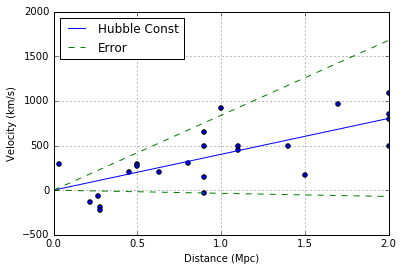

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

with open("hubble1.dat") as textfile:
    lines = [line.split() for line in textfile]
    
#print lines    # distance (Mpc) , velocity (km/s)

distance = []
velocity = []

for i in range (0,len(lines)):
    distance.append(float(lines[i][0]))
    velocity.append(float(lines[i][1]))

#print distance
#print velocity

xp = np.linspace(0,2,10)

def func(x, a):
    return a*x

m, b = curve_fit(func, distance, velocity)

div = []
for i in range(len(velocity)):
    if i == 1:
        a = 0
    else:
        a = velocity[i]/(distance[i])
        div.append(float(a))
    
sigma1 = np.std(div)
#print sigma1
#print div

p1 = plt.plot(xp, m*xp, label = 'Hubble Const')
p2 = plt.plot(xp, (m+sigma1)*xp, '--', label = 'Error')
plt.plot(xp, (m-sigma1)*xp, 'g--')
plt.grid(True)
    
plt.scatter(distance, velocity)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.xlim(0,2)
plt.legend(loc = 'upper left')
print 'The measured Hubble constant is', m, 'with an error of +/-', sigma1

The measured Hubble constant is [ 67.23871586] with an error of +/- 18.6830637796


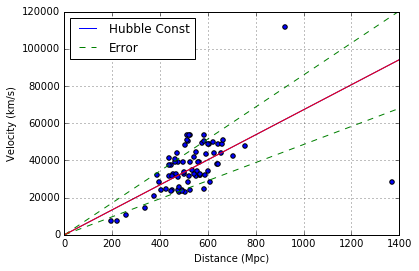

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

with open("hubble2.dat") as textfile:
    lines = [line.split() for line in textfile]
    
#print lines    # distance (Mpc) , velocity (km/s)

distance2 = []
velocity2 = []

for i in range (0,len(lines)):
    distance2.append(float(lines[i][0]))
    velocity2.append(float(lines[i][1]))

#print distance
#print velocity

xp = np.linspace(0,1400,100)

def func(x, a):
    return a*x

m, b = curve_fit(func, distance2, velocity2)

div = []
for i in range(len(velocity2)):
    a = velocity2[i]/(distance2[i])
    div.append(float(a))
    
sigma2 = np.std(div)

plt.plot(xp, m*xp, label = 'Hubble Const')
plt.plot(xp, (m+sigma2)*xp, '--', label = 'Error')
plt.plot(xp, (m-sigma2)*xp, 'g--')
plt.grid(True)

plt.plot(xp, m*xp)
plt.grid(True)
    
plt.scatter(distance2, velocity2)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.ylim(0,120000)
plt.xlim(0,1400)
plt.legend(loc = 'upper left')
print 'The measured Hubble constant is', m, 'with an error of +/-', sigma2

1b)

The Hubble constant for the hubble2 data is consistent with the estimated value from the Planck satellite. The Hubble constant for the hubble1 data is not consistent with the estimated value from the Planck satellite. The distance axis is likely very uncertain.

1c)

Looking at the data we can see that the expansion rate is relatively constant. If the expansion rate was accelerating the graph would curve to the right. If the expansion rate was decelerating the graph would curve upwards.

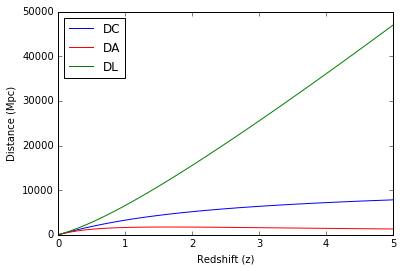

In [45]:
from scipy.integrate import quad
import matplotlib as mpl
import matplotlib.lines as mlines

OM = 0.27
OL = 0.73
OR = 8.4*10**(-5)
H_0 = 72
c = 3*10**(5) # km/s
DH =c/H_0

def Ez(z):
    Ez = (( (OR *(1+z)**(4)) +  (OM * (1+z)**(3)) + ((1 - OM - OL) * (1+z)**(2))  + OL ) ** (1.0/2))
    return Ez

def DC1(z):
    return DH*(1/Ez(z))

def DC(z):
    DC = quad(DC1, 0, z)
    return DC[0]

N = 50

z = np.linspace(0,5, N)

Dc = []

for i in range(N):
    Dc.append(DC(z[i]))

DA = []
for i in range(N):
    DA.append(DC(z[i])/(1+z[i]))

    
DL = []
for i in range(N):
    DL.append(DC(z[i]) / (1 + z[i])**(-1) )

      
p1 = plt.plot(z,Dc, 'b', label = 'DC')
p2 = plt.plot(z,DA, 'r', label = 'DA')
p3 = plt.plot(z,DL, 'g', label = 'DL')

plt.xlabel('Redshift (z)')
plt.ylabel('Distance (Mpc)')
plt.legend(loc = 'upper left', numpoints = 1, scatterpoints = 1)

plt.show()

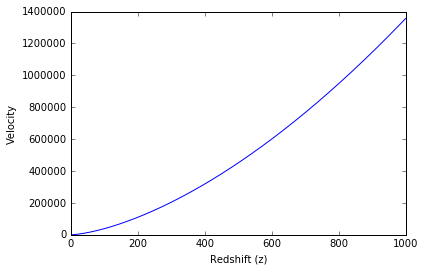

In [4]:
z = np.linspace(0,1000,1000)

plt.plot(z ,Ez(z)*72)
plt.xlabel('Redshift (z)')
plt.ylabel('Velocity')